In [27]:
# Recognition
# https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb
# https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb
# https://github.com/printfinn/mnist/blob/master/Handwritten%20Digit%20Recognition.ipynb
# https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# https://colab.research.google.com/github/Aafreen2603/Handwritten-digit-recognition-using-CNN/blob/main/Handwritten_digit_recognition.ipynb
# https://medium.com/dataseries/a-simple-introduction-to-deep-learning-recognizing-handwritten-digits-323228426ce7
# https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/
# https://cocalc.com/share/public_paths/abe10a55d29e02e9b06d7c2d7be086bcb9c0f2ab/Self-study%20Notebooks/03%20-%20Numbers%20and%20arithmetic.ipynb
# https://yash-kukreja-98.medium.com/recognizing-handwritten-digits-in-real-life-images-using-cnn-3b48a9ae5e3
# https://medium.com/data-science/handwritten-digit-mnist-pytorch-977b5338e627
# https://github.com/billy-enrizky/Pytorch-Handwritten-Digit-Recognition
# https://nextjournal.com/gkoehler/pytorch-mnist
# https://docs.pytorch.org/tutorials/beginner/nn_tutorial.html
# https://medium.com/@simple.schwarz/how-to-build-a-gan-for-generating-mnist-digits-in-pytorch-b9bf71269da8
# https://zackproser.com/blog/mnist-pytorch-hand-drawn-digit-recognizer
# https://cocalc.com/github/ibm/watson-machine-learning-samples/blob/master/cpd4.0/notebooks/python_sdk/deployments/pytorch/Use%20Pytorch%20to%20recognize%20hand-written%20digits.ipynb
# https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/
# https://www.geeksforgeeks.org/python/python-classifying-handwritten-digits-with-tensorflow/
# https://github.com/kavicastelo/digit-recognizer-ml
# https://medium.com/@sidharthgn/handwritten-digit-recognition-on-mnist-dataset-using-python-4e36ce630995

# Py
# https://stackoverflow.com/questions/57502484/what-is-the-difference-between-a-py-file-and-ipynb-file
# https://docs.jupyter.org/en/latest/running.html
# https://jupyter.org/install
# https://www.geeksforgeeks.org/python/how-to-run-an-ipynb-jupyter-notebook-from-terminal/
# https://www.dataquest.io/blog/jupyter-notebook-tutorial/
# https://swcarpentry.github.io/python-novice-gapminder/aio.html
# https://www.dataquest.io/blog/jupyter-notebook-tutorial/
# PyCharm
# Jupyter

# pip install jupyterlab
# pip install notebook

# sudo apt install jupyter-core

# jupyter lab
# jupyter notebook

# jupyter lab
# jupyter notebook main.ipynb

# pip install tensorflow
# pip install matplotlib
# pip install seaborn
# pip install numpy
# pip install pandas
# pip install math
# pip install datetime
# pip install pydot
# https://graphviz.gitlab.io/download/
# winget install graphviz


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.12.6
Tensorflow version: 2.20.0
Keras version: 3.11.3


In [2]:
%load_ext tensorboard
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


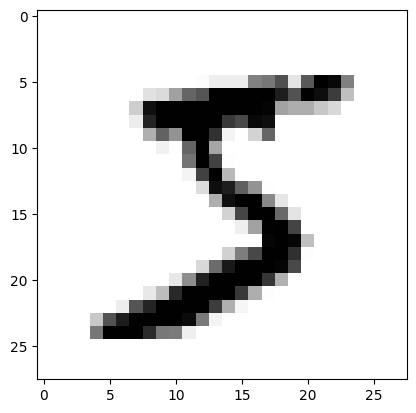

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

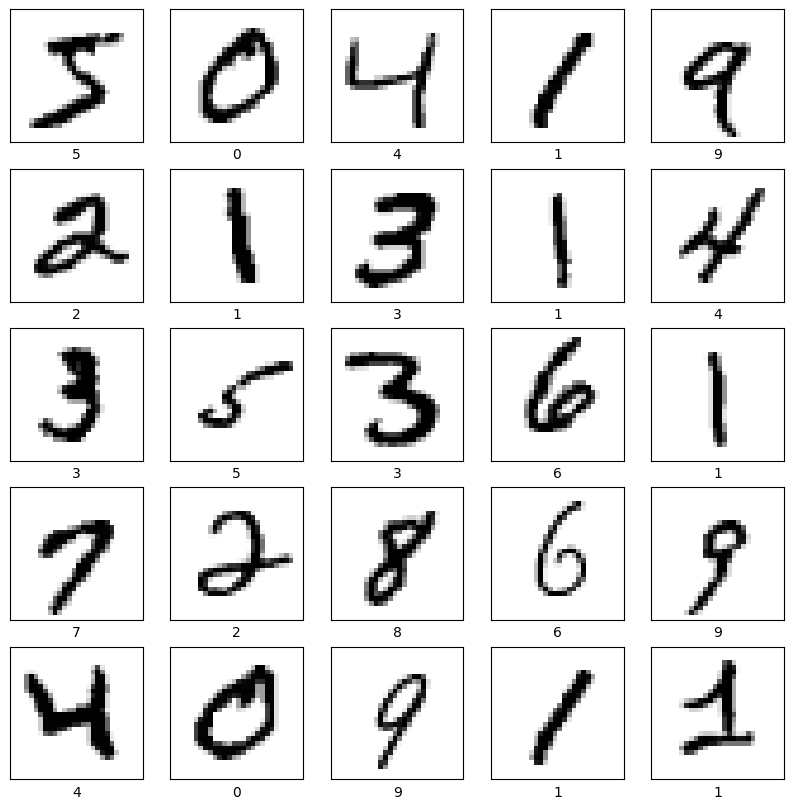

In [6]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [7]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


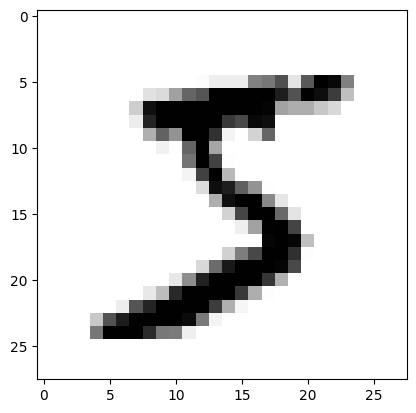

In [8]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

In [9]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

model.summary()

C:\Users\user1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#tf.keras.utils.plot_model(
#    model,
#    show_shapes=True,
#    show_layer_names=True,
#)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [12]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [13]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9230 - loss: 0.5176 - val_accuracy: 0.9476 - val_loss: 0.3454
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9551 - loss: 0.2988 - val_accuracy: 0.9628 - val_loss: 0.2633
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9599 - loss: 0.2608 - val_accuracy: 0.9616 - val_loss: 0.2411
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9624 - loss: 0.2360 - val_accuracy: 0.9680 - val_loss: 0.2162
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9659 - loss: 0.2209 - val_accuracy: 0.9617 - val_loss: 0.2329
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9662 - loss: 0.2130 - val_accuracy: 0.9670 - val_loss: 0.2099
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.2054 - val_accuracy: 0.9699 - val_loss: 0.1960
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9669 - loss: 0.2016 - 

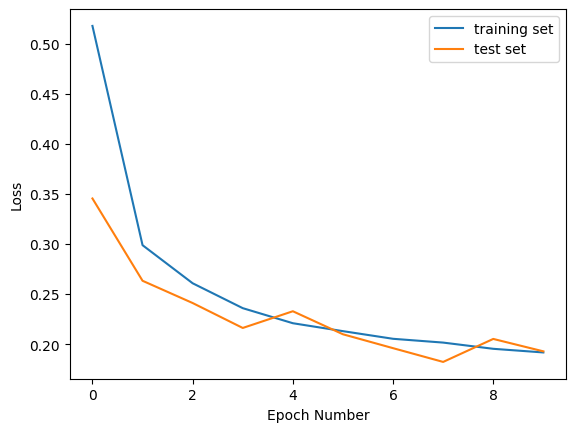

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

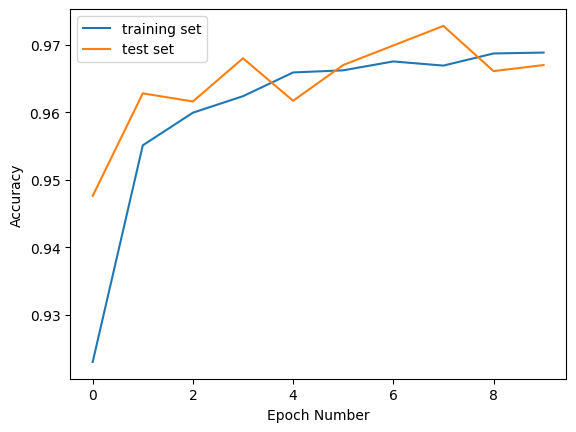

In [15]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [17]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

In [18]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

In [19]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

In [20]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

 71/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

C:\Users\user1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\user1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


predictions_one_hot: (10000, 10)


,0,1,2,3,4,5,6,7,8,9
0,1.409351e-06,1.599101e-05,1.097381e-03,1.881338e-03,7.406116e-09,1.088476e-06,8.171744e-11,9.969709e-01,1.858157e-05,1.325167e-05
1,1.102922e-04,4.038604e-04,9.977612e-01,6.073345e-04,2.143000e-08,3.804814e-06,3.709748e-04,2.979772e-07,7.421205e-04,2.074346e-09
2,9.635357e-06,9.844124e-01,1.355964e-03,7.911386e-04,1.431048e-04,8.782573e-05,2.629188e-04,6.076416e-03,6.784536e-03,7.620134e-05
3,9.513128e-01,1.709019e-03,1.959533e-02,7.636351e-04,4.966608e-03,3.420476e-05,3.800906e-03,1.699750e-02,9.962657e-05,7.204926e-04
4,1.646554e-06,2.534778e-06,2.642022e-05,8.866305e-07,9.993004e-01,1.382629e-06,4.422152e-06,4.576322e-05,1.696496e-07,6.164128e-04
...,...,...,...,...,...,...,...,...,...,...
9995,1.841275e-07,6.078164e-05,9.978200e-01,2.006896e-03,4.575092e-13,4.842421e-08,1.449307e-08,3.253665e-05,7.953501e-05,2.618223e-10
9996,1.654755e-07,2.069027e-05,1.510585e-04,9.991304e-01,3.784207e-09,6.238047e-04,2.521970e-09,1.056027e-05,2.467023e-05,3.855780e-05
9997,1.161345e-08,6.181695e-06,3.437136e-09,1.652620e-07,9.986784e-01,3.373636e-08,1.973203e-08,1.446354e-05,2.040727e-05,1.280248e-03
9998,2.179610e-04,2.039333e-05,1.143284e-06,5.113790e-05,2.950184e-08,9.955171e-01,8.629324e-04,3.633617e-06,3.324424e-03,1.194820e-06


In [21]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


7


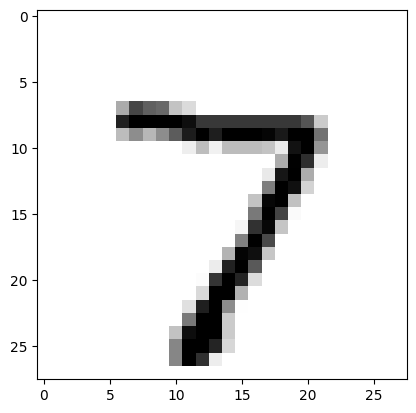

In [22]:
print(predictions[0])

plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

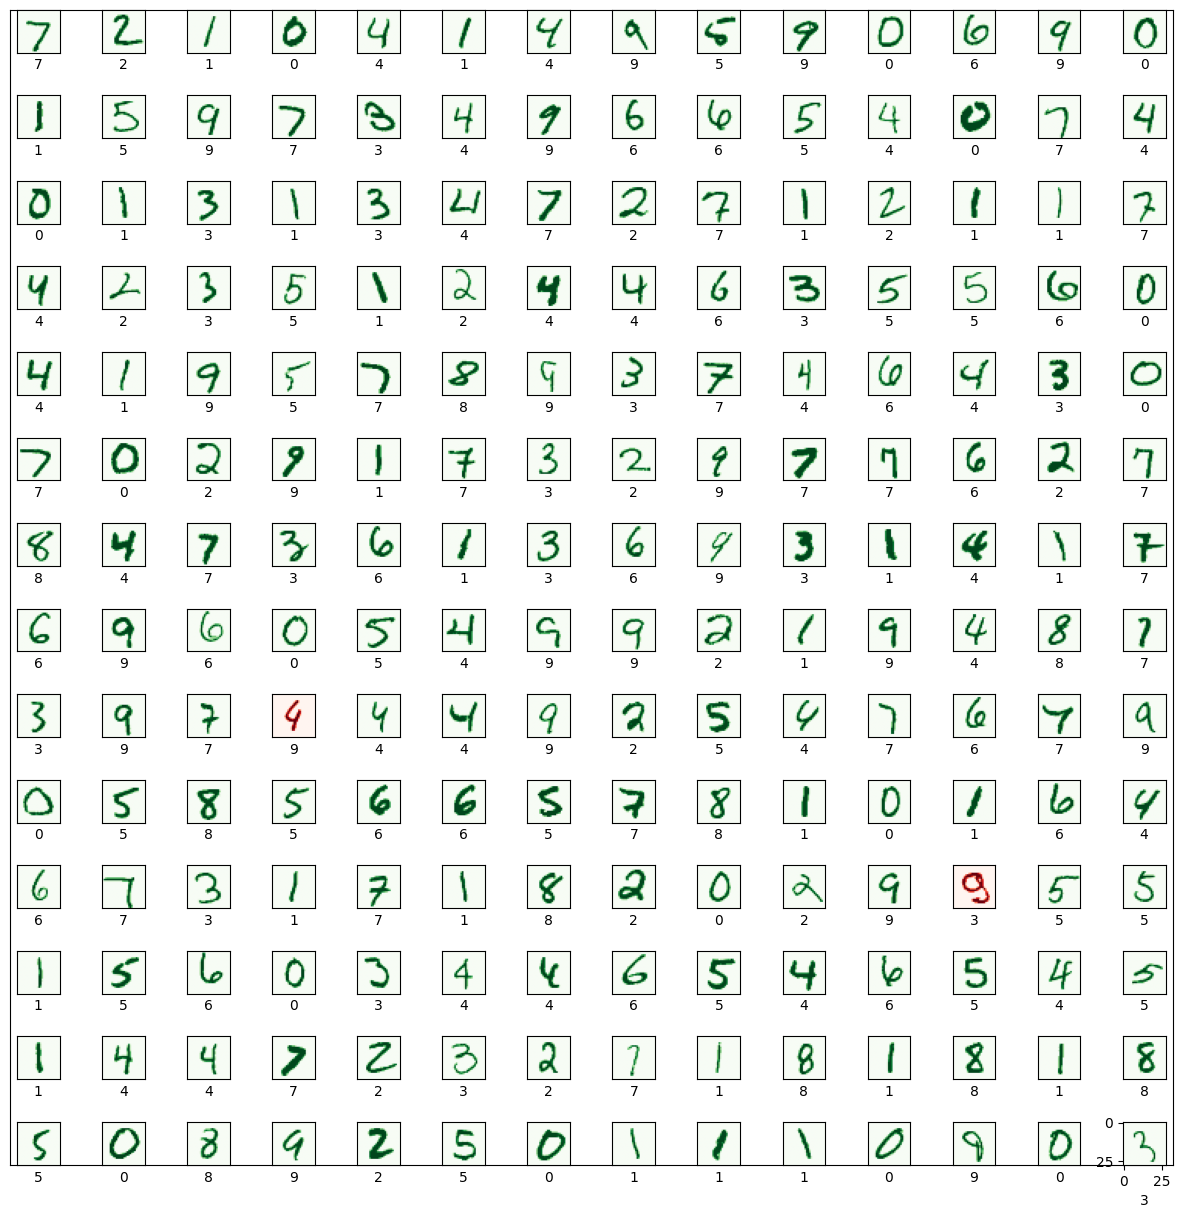

In [23]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

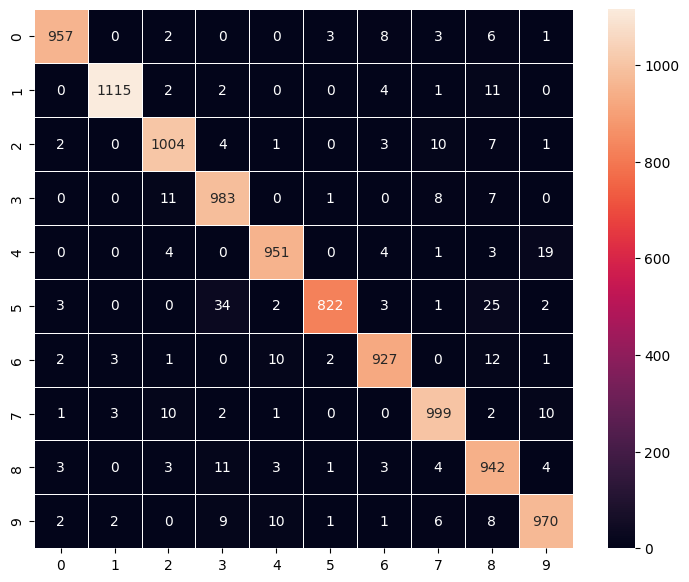

In [24]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [25]:
%tensorboard --logdir .logs/fit